In [2]:
import warnings
warnings.filterwarnings('ignore')

#DML
import pandas as pd

#DV
import seaborn as sns
import matplotlib.pyplot as plt

Data Loading


In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [4]:
df_train.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [5]:
df_test.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.0,2,1.0,0.0,138882.09


In [6]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df_test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [10]:
submission.head(5)

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


Combining Datasets


In [11]:
df_train['train'] = 1
df_test['train'] = 0

In [12]:
df = pd.concat([df_train,df_test])

In [13]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,train
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0,1
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,1


In [14]:
df_train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
train              0
dtype: int64

### 3. Data Description


    Customer ID: A unique identifier for each customer - 
    Surname: The customer's surname or last name - (Feat Engineer)
    Credit Score: A numerical value representing the customer's credit score - numvar
    Geography: The country where the customer resides (France, Spain or Germany) - catvar
    Gender: The customer's gender (Male or Female) - catvar
    Age: The customer's age. - numvar
    Tenure: The number of years the customer has been with the bank - numvar
    Balance: The customer's account balance - numvar
    NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card) -numvar
    HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no) - catvar
    IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no) -catvar
    EstimatedSalary: The estimated salary of the customer - numvar
    Exited: Whether the customer has churned (1 = yes, 0 = no) - targetvariable


### 4. Exploratory Data Analysis

In [15]:
df_cat = df_train[['Geography','Gender','HasCrCard','IsActiveMember']]
df_num = df_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]

##### Categorical Analysis

In [16]:
df_cat['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [17]:
#Probability of Location to Exited
pd.pivot_table(data=df,index='Geography',values='Exited')

,Exited
Geography,
France,0.165282
Germany,0.378952
Spain,0.172176


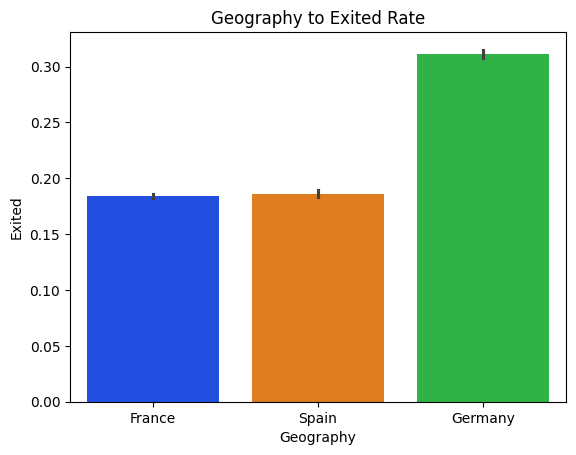

In [18]:
sns.barplot(data=df,y='Exited',x='Geography',palette='bright')
plt.title('Geography to Exited Rate')
plt.show()

In [19]:
df_cat['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [20]:
pd.pivot_table(data=df,index='Gender',values='Exited')

,Exited
Gender,
Female,0.279687
Male,0.159055


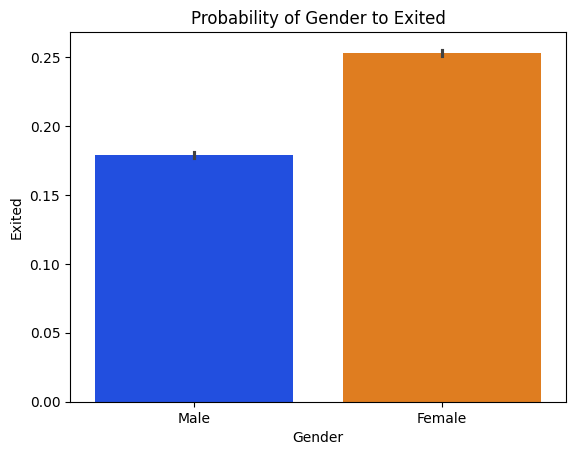

In [21]:
sns.barplot(data=df,x='Gender',y='Exited',palette='bright')
plt.title('Probability of Gender to Exited')
plt.show()

In [22]:
df_cat['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [23]:
pd.pivot_table(data=df,index='HasCrCard',values='Exited')

,Exited
HasCrCard,
0.0,0.227429
1.0,0.206433


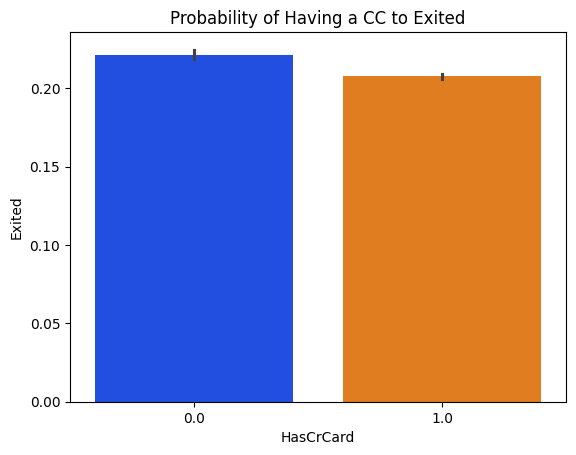

In [24]:
sns.barplot(data=df,x='HasCrCard',y='Exited',palette='bright')
plt.title('Probability of Having a CC to Exited')
plt.show()

In [25]:
df_cat['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

In [27]:
pd.pivot_table(data=df,index='IsActiveMember',values='Exited')

,Exited
IsActiveMember,
0.0,0.297086
1.0,0.125345


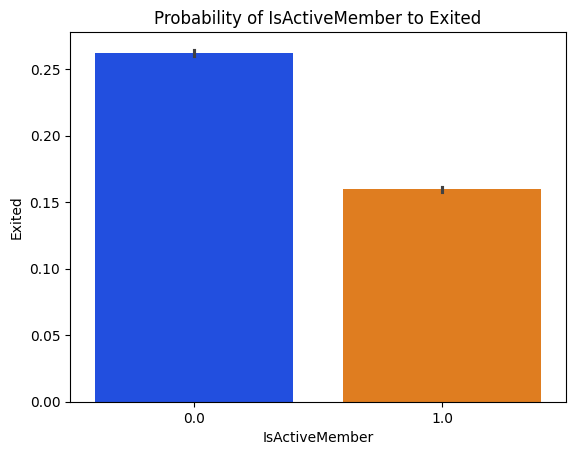

In [26]:
sns.barplot(data=df,x='IsActiveMember',y='Exited',palette='bright')
plt.title('Probability of IsActiveMember to Exited')
plt.show()

##### Numerical Data

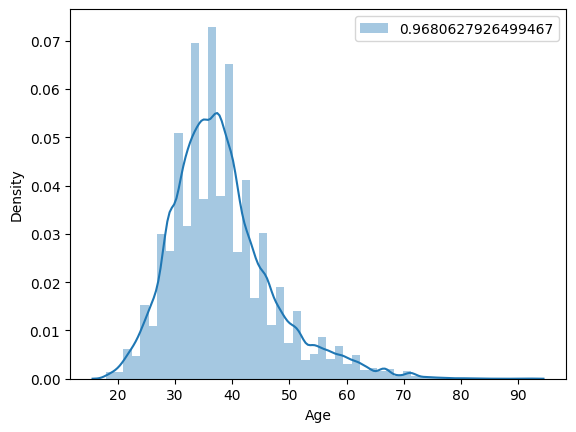

In [31]:
sns.distplot(df_num['Age'],label=df_num['Age'].skew())
plt.legend()
plt.show()

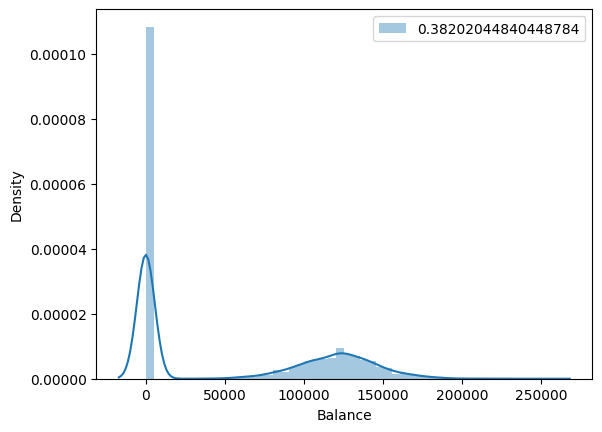

In [32]:
sns.distplot(df_num['Balance'],label=df_num['Balance'].skew())
plt.legend()
plt.show()

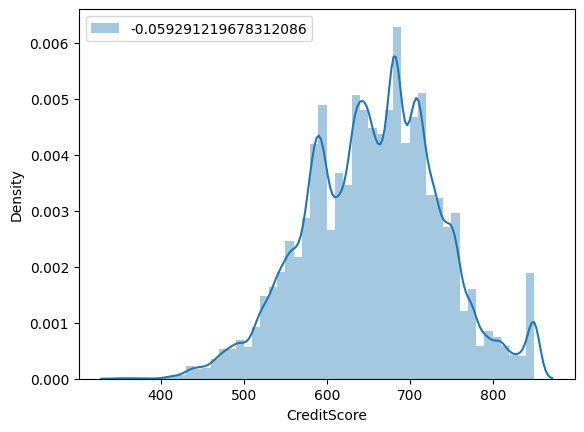

In [34]:
sns.distplot(df_num['CreditScore'],label=df_num['CreditScore'].skew())
plt.legend()
plt.show()

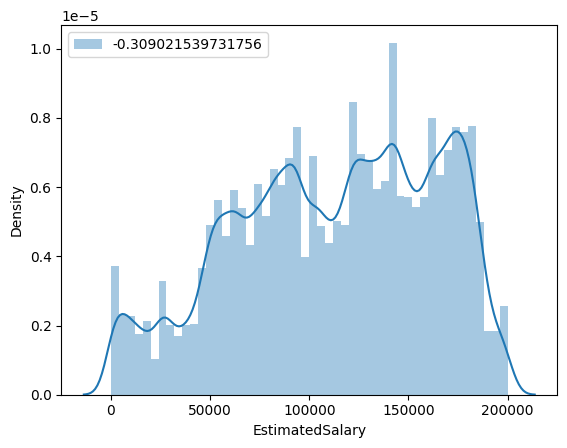

In [35]:
sns.distplot(df_num['EstimatedSalary'],label=df_num['EstimatedSalary'].skew())
plt.legend()
plt.show()

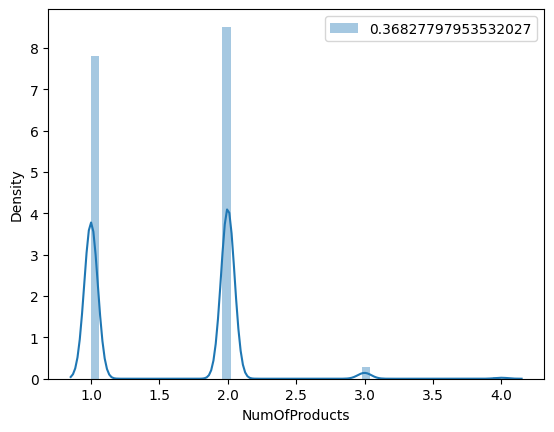

In [36]:
sns.distplot(df_num['NumOfProducts'],label=df_num['NumOfProducts'].skew())
plt.legend()
plt.show()

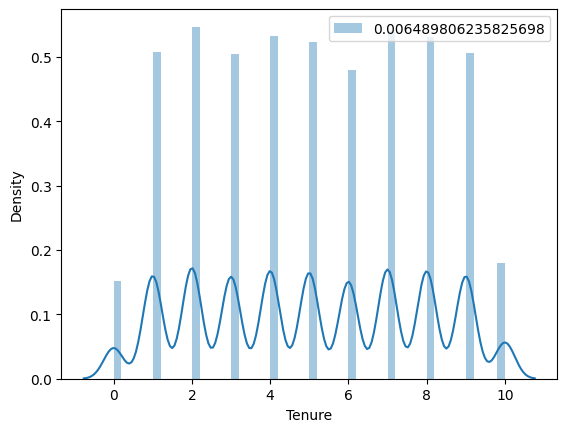

In [37]:
sns.distplot(df_num['Tenure'],label=df_num['Tenure'].skew())
plt.legend()
plt.show()

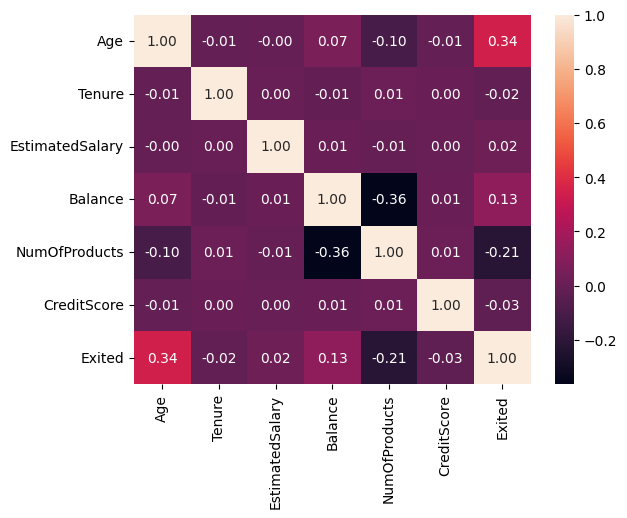

In [41]:
sns.heatmap(df[['Age','Tenure','EstimatedSalary','Balance','NumOfProducts','CreditScore','Exited']].corr(),annot=True,fmt='.2f')
plt.show()